In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt


from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score, make_scorer, f1_score, accuracy_score

In [6]:
mp = pd.read_csv('~/Desktop/To_prediction/ESCO_all_pheno_MGX.csv').rename(columns={'Unnamed: 0' : 'External ID'})
mp = mp.set_index('External ID')
mp

,s__43-108_sp001915545:1,s__Absiella_dolichum:1,s__Absiella_innocuum:1,s__Absiella_sp000163515:1,s__Absiella_sp000165065:1,s__Acetatifactor_sp003447295:1,s__Acetatifactor_sp900066365:1,s__Acetatifactor_sp900066365:2,s__Acetatifactor_sp900066565:1,s__Acidaminococcus_intestini:1,...,s__esco_HumanRef_tmp_v1.0.1_961,s__esco_HumanRef_tmp_v1.0.1_966,s__esco_HumanRef_tmp_v1.0.1_968,s__esco_HumanRef_tmp_v1.0.1_973,s__esco_HumanRef_tmp_v1.0.1_983,s__esco_HumanRef_tmp_v1.0.1_989,s__esco_HumanRef_tmp_v1.0.1_990,s__esco_HumanRef_tmp_v1.0.1_998,s__esco_HumanRef_tmp_v1.0.1_999,Diagnosis
External ID,,,,,,,,,,,,,,,,,,,,,
CSM5MCVL,0.023,0.000,0.000,0.002,0.000,0.001,0.000,0.002,0.001,0.145,...,0.000,0.000,0.000,0.003,0.000,0.001,0.000,0.002,0.0,CD
CSM5MCVN,0.018,0.000,0.001,0.002,0.000,0.000,0.000,0.002,0.001,3.072,...,0.000,0.000,0.000,0.002,0.000,0.001,0.000,0.002,0.0,CD
CSM5MCW6,0.034,0.000,0.010,0.006,0.000,0.001,0.001,0.003,0.004,0.001,...,0.001,0.001,0.002,0.005,0.000,0.000,0.000,0.000,0.0,CD
CSM5MCWC,0.026,0.004,0.454,0.004,0.012,0.019,0.000,0.130,0.040,0.000,...,0.000,0.000,0.003,0.000,0.000,0.019,0.000,0.000,0.0,CD
CSM5MCWE,0.000,0.002,0.304,0.002,0.008,0.021,0.000,0.057,0.018,0.000,...,0.001,0.000,0.002,0.000,0.000,0.015,0.001,0.000,0.0,CD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSMA265D,0.006,0.005,0.048,0.031,0.003,0.018,0.000,0.025,0.038,0.001,...,0.000,0.000,0.006,0.000,0.001,0.007,0.003,0.000,0.0,Control
PSMA265F,0.012,0.005,0.073,0.561,0.003,0.005,0.000,0.037,0.022,0.000,...,0.000,0.000,0.010,0.000,0.002,0.012,0.005,0.000,0.0,Control
PSMA265H,0.006,0.018,0.094,0.573,0.002,0.010,0.001,0.024,0.025,0.001,...,0.000,0.000,0.006,0.000,0.001,0.010,0.003,0.000,0.0,Control


In [7]:
mp = pd.read_csv('~/Downloads/ESCO_all_pheno__.csv').rename(columns={'Unnamed: 0' : 'External ID'})
mp = mp.set_index('External ID')
mp = mp.replace(np.NAN, 0)
mp

,s__43-108_sp001915545:1,s__Absiella_dolichum:1,s__Absiella_innocuum:1,s__Absiella_sp000163515:1,s__Absiella_sp000165065:1,s__Acetatifactor_sp003447295:1,s__Acetatifactor_sp900066365:1,s__Acetatifactor_sp900066365:2,s__Acetatifactor_sp900066565:1,s__Acidaminococcus_intestini:1,...,s__esco_HumanRef_tmp_v1.0.1_961,s__esco_HumanRef_tmp_v1.0.1_966,s__esco_HumanRef_tmp_v1.0.1_968,s__esco_HumanRef_tmp_v1.0.1_973,s__esco_HumanRef_tmp_v1.0.1_983,s__esco_HumanRef_tmp_v1.0.1_989,s__esco_HumanRef_tmp_v1.0.1_990,s__esco_HumanRef_tmp_v1.0.1_998,s__esco_HumanRef_tmp_v1.0.1_999,Diagnosis
External ID,,,,,,,,,,,,,,,,,,,,,
CSM5MCVL,3.772261,0.000000,0.000000,6.214608,0.000000,6.907755,0.000000,6.214608,6.907755,1.931022,...,0.000000,0.000000,0.000000,5.809143,0.000000,6.907755,0.000000,6.214608,0.0,CD
CSM5MCVN,4.017384,0.000000,6.907755,6.214608,0.000000,0.000000,0.000000,6.214608,6.907755,-1.122329,...,0.000000,0.000000,0.000000,6.214608,0.000000,6.907755,0.000000,6.214608,0.0,CD
CSM5MCW6,3.381395,0.000000,4.605170,5.115996,0.000000,6.907755,6.907755,5.809143,5.521461,6.907755,...,6.907755,6.907755,6.214608,5.298317,0.000000,0.000000,0.000000,0.000000,0.0,CD
CSM5MCWC,3.649659,5.521461,0.789658,5.521461,4.422849,3.963316,0.000000,2.040221,3.218876,0.000000,...,0.000000,0.000000,5.809143,0.000000,0.000000,3.963316,0.000000,0.000000,0.0,CD
CSM5MCWE,0.000000,6.214608,1.190728,6.214608,4.828314,3.863233,0.000000,2.864704,4.017384,0.000000,...,6.907755,0.000000,6.214608,0.000000,0.000000,4.199705,6.907755,0.000000,0.0,CD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSMA265D,5.115996,5.298317,3.036554,3.473768,5.809143,4.017384,0.000000,3.688879,3.270169,6.907755,...,0.000000,0.000000,5.115996,0.000000,6.907755,4.961845,5.809143,0.000000,0.0,Control
PSMA265F,4.422849,5.298317,2.617296,0.578034,5.809143,5.298317,0.000000,3.296837,3.816713,0.000000,...,0.000000,0.000000,4.605170,0.000000,6.214608,4.422849,5.298317,0.000000,0.0,Control
PSMA265H,5.115996,4.017384,2.364460,0.556870,6.214608,4.605170,6.907755,3.729701,3.688879,6.907755,...,0.000000,0.000000,5.115996,0.000000,6.907755,4.605170,5.809143,0.000000,0.0,Control


In [8]:
select_sampels = pd.read_csv('~/Desktop/selected_samples_MGX.csv')
select_sampels = select_sampels.set_index('External ID')
select_sampels.drop("Participant ID", inplace=True, axis=1)
select_sampels

,fecalcal_max,Diagnosis
External ID,,
CSM67UA2,37.17836,CD
CSM5MCVN,16.32450,CD
CSM67UBZ,14.30000,UC
CSM5MCXL,70.91411,UC
CSM5MCY8,232.60620,UC
...,...,...
PSM7J19N,16.78459,nonIBD
PSM6XBW3,79.82248,nonIBD
PSM7J12J,289.22620,CD


In [9]:
mp = mp.loc[select_sampels.index,:]
mp = mp.loc[:,mp.columns.str.startswith('s__')]
mp["diagnosis"] = select_sampels.iloc[:,-1]
mp.reset_index(inplace=True)

In [10]:
features = mp.iloc[:, 1:-1]
targets = mp.iloc[:, -1]


In [11]:
MTX_X = features
MTX_y = targets

#fill NA's
MTX_X.fillna(MTX_X.median(), inplace=True)
MTX_X = StandardScaler().fit_transform(MTX_X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(MTX_X, MTX_y, test_size=0.40, random_state=42)

Best Model:
RandomForestClassifier(max_features=4, min_samples_split=5, n_estimators=50,
                       random_state=42)


<AxesSubplot:>

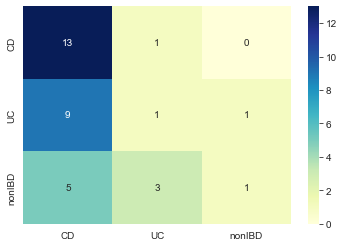

In [18]:
n_estimators_RF = [5, 10, 25, 50, 100, 200, 400, 800]
max_features_RF = [2,4,8,16,32,64,128,None]
parameters_RF = {'n_estimators': n_estimators_RF,
                'max_features': max_features_RF}

RF_model = RandomForestClassifier(max_depth=None,
                                  min_samples_split=5, random_state=42)
RF_clf = GridSearchCV(RF_model, parameters_RF, cv=5, scoring= 'accuracy') #completeness_score')

RF_clf.fit(X_train, y_train)

print("Best Model:")
RF_model = RF_clf.best_estimator_
print(RF_model)

RF_predictions = RF_model.predict(X_test)

# creating a confusion matrix
labels = np.unique(y_test)
cm_RF = confusion_matrix(y_test, RF_predictions,labels=labels)
cm_RF = pd.DataFrame(cm_RF, index=labels, columns=labels)
sns.heatmap(cm_RF, cmap="YlGnBu", annot=True)

In [19]:
from sklearn import metrics
print(f'Accuracy {round(metrics.accuracy_score(y_test, RF_predictions)*100,2)}%')

Accuracy 44.12%


In [144]:
imp_df = pd.DataFrame({
    "": features.columns,
    "feature_importances": RF_clf.best_estimator_.feature_importances_
})
species_threshold = 0.005
feature_importances = imp_df.sort_values(by="feature_importances", ascending=False)

feature_importances['bool'] = feature_importances['feature_importances'] >= species_threshold
feature_importances = feature_importances[feature_importances['bool'] == True].T

feature_importances.columns = feature_importances.iloc[0]
feature_importances = feature_importances[1:1]

,s__esco_HumanRef_tmp_v1.0.1_230,s__Prevotella_bivia:1,s__Clostridium_Q_symbiosum:1,s__UBA1191_sp900066305,s__esco_HumanRef_tmp_v1.0.1_1561,s__Muribaculum_intestinale,s__esco_HumanRef_tmp_v1.0.1_1542,s__esco_HumanRef_tmp_v1.0.1_159,s__Prevotella_sp000436035:1,s__UBA1685_sp002320595:1,...,s__Prevotella_multiformis,s__esco_HumanRef_tmp_v1.0.1_102,s__esco_HumanRef_tmp_v1.0.1_1556,s__Odoribacter_massiliensis:1,s__UBA7173_sp001701135:1,s__esco_HumanRef_tmp_v1.0.1_1713,s__Eubacterium_G_ventriosum:1,s__Sellimonas_sp002161525,s__esco_HumanRef_tmp_v1.0.1_261,s__Alistipes_senegalensis:1


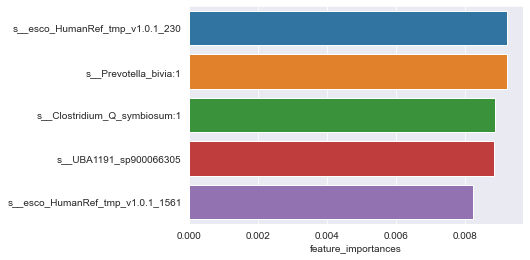

In [159]:
imp_df = pd.DataFrame({
    "": features.columns,
    "feature_importances": RF_clf.best_estimator_.feature_importances_
})
feature_importances_top_5 = imp_df.sort_values(by="feature_importances", ascending=False).head(5)
sns.barplot(x='feature_importances', y= "", data= feature_importances_top_5)
plt.show()
feature_importances_top_5 = feature_importances_top_5.T
feature_importances_top_5.columns = feature_importances_top_5.iloc[0]
feature_importances_top_5 = feature_importances_top_5[1:1]

In [160]:
feature_importances_mp = mp.loc[:,feature_importances_top_5.columns]
feature_importances_mp['diagnosis'] = mp["diagnosis"]
feature_importances_mp
# feature_importances_mp = feature_importances_mp.groupby('diagnosis')
# feature_importances_mp.reset_index(inplace=True)

,s__esco_HumanRef_tmp_v1.0.1_230,s__Prevotella_bivia:1,s__Clostridium_Q_symbiosum:1,s__UBA1191_sp900066305,s__esco_HumanRef_tmp_v1.0.1_1561,diagnosis
0,5.298317,3.381395,1.589635,0.000000,5.521461,CD
1,6.907755,5.809143,0.787458,0.000000,0.000000,CD
2,4.710531,5.298317,0.203341,0.000000,4.509860,UC
3,4.605170,6.214608,2.645075,0.000000,6.907755,UC
4,3.912023,6.907755,3.296837,6.907755,6.907755,UC
...,...,...,...,...,...,...
78,3.540459,4.342806,1.851509,6.907755,5.809143,nonIBD
79,3.611918,0.000000,-0.376380,6.907755,6.214608,nonIBD
80,0.000000,0.000000,-0.871712,0.000000,0.000000,CD
81,4.710531,4.828314,2.764621,6.214608,5.298317,UC


s__esco_HumanRef_tmp_v1.0.1_230


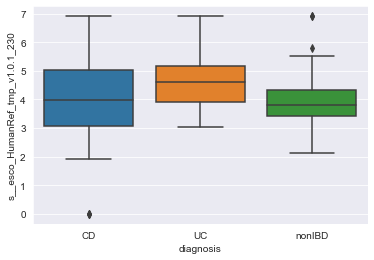

s__Prevotella_bivia:1


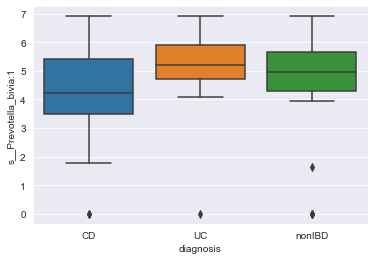

s__Clostridium_Q_symbiosum:1


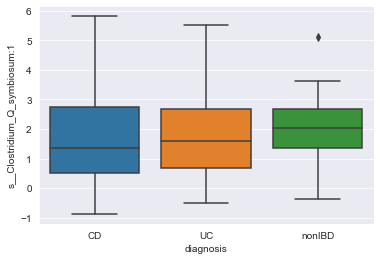

s__UBA1191_sp900066305


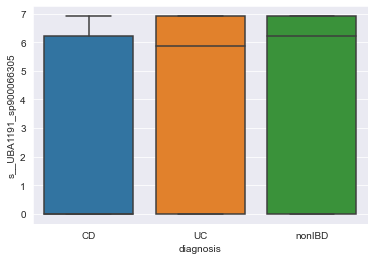

s__esco_HumanRef_tmp_v1.0.1_1561


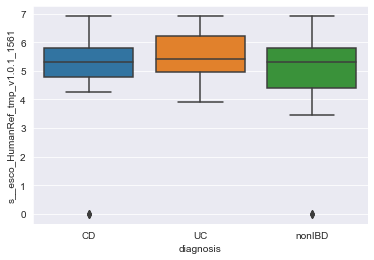

In [161]:
for column_name in feature_importances_mp.iloc[:,:-1]:
    print(column_name)
    sns.boxplot(data=feature_importances_mp, x="diagnosis", y=feature_importances_mp[column_name])
    plt.show()

In [164]:
feature_importances_mp = mp.loc[:,feature_importances_top_5.columns]
feature_importances_mp[:] = np.where(feature_importances_mp == 0,0,1)
feature_importances_mp['diagnosis'] = mp["diagnosis"]
feature_importances_mp

,s__esco_HumanRef_tmp_v1.0.1_230,s__Prevotella_bivia:1,s__Clostridium_Q_symbiosum:1,s__UBA1191_sp900066305,s__esco_HumanRef_tmp_v1.0.1_1561,diagnosis
0,1.0,1.0,1.0,0.0,1.0,CD
1,1.0,1.0,1.0,0.0,0.0,CD
2,1.0,1.0,1.0,0.0,1.0,UC
3,1.0,1.0,1.0,0.0,1.0,UC
4,1.0,1.0,1.0,1.0,1.0,UC
...,...,...,...,...,...,...
78,1.0,1.0,1.0,1.0,1.0,nonIBD
79,1.0,0.0,1.0,1.0,1.0,nonIBD
80,0.0,0.0,1.0,0.0,0.0,CD
81,1.0,1.0,1.0,1.0,1.0,UC


s__esco_HumanRef_tmp_v1.0.1_230


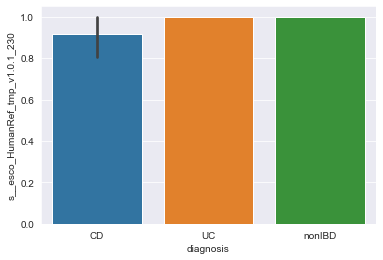

s__Prevotella_bivia:1


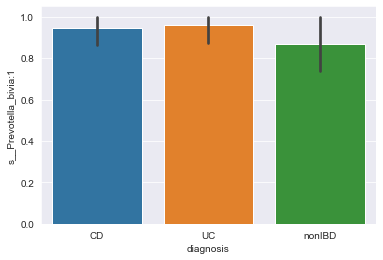

s__Clostridium_Q_symbiosum:1


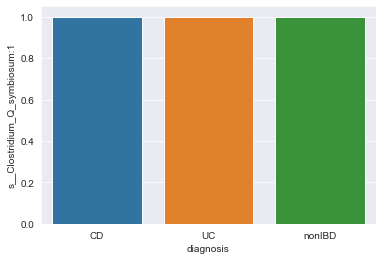

s__UBA1191_sp900066305


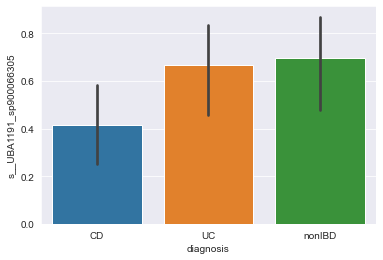

s__esco_HumanRef_tmp_v1.0.1_1561


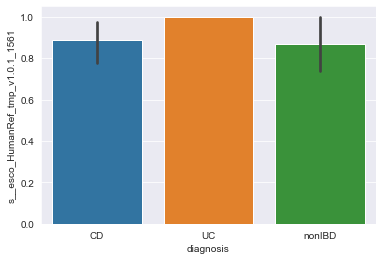

In [165]:
for column_name in feature_importances_mp.iloc[:,:-1]:
    print(column_name)
    sns.barplot(data=feature_importances_mp, x="diagnosis", y=feature_importances_mp[column_name])
    plt.show()